In [1]:
import numpy as np
import pandas as pd
import adafdr.method as md
import adafdr.data_loader as dl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Proteomics

In [2]:
data_path = '/data3/martin/AdaFDRpaper_data'
file_path = data_path + '/proteomics/proteomics'
df_data = pd.read_csv(file_path, sep=',')
p = df_data['p_val'].as_matrix()
x = df_data['x'].as_matrix()
print('p:', p.shape)
print('x:', x.shape)

p: (2666,)
x: (2666,)


## covariate visualization

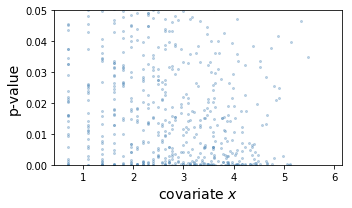

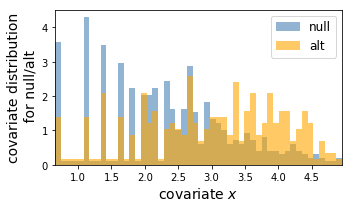

In [3]:
md.adafdr_explore(p, x, output_folder=None)

## hypothesis testing

In [4]:
# Baseline methods: BH, SBH
alpha = 0.1
n_rej, t_rej = md.bh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for BH: %d'%n_rej)
n_rej, t_rej, pi0_hat = md.sbh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for SBH: %d'%n_rej)
res = md.adafdr_test(p, x, alpha=alpha, fast_mode=True, single_core=False)
n_rej = res['n_rej']
t_rej = res['threshold']
print('# number of discoveries for adafdr: %d'%np.sum(p<=t_rej))

# number of discoveries for BH: 244
# number of discoveries for SBH: 358
# number of discoveries for adafdr: 409


In [5]:
%%bash -s "$file_path" "$alpha"
Rscript analysis_single.R $1 $2

[1] "data_path: /data3/martin/AdaFDRpaper_data/proteomics/proteomics"
[1] "alpha: 0.1"
[1] "Loading the data"
alpha = 0.48: FDPhat 0.4799, Number of Rej. 1640
alpha = 0.47: FDPhat 0.4699, Number of Rej. 1630
alpha = 0.46: FDPhat 0.4596, Number of Rej. 1584
alpha = 0.45: FDPhat 0.4495, Number of Rej. 1555
alpha = 0.44: FDPhat 0.4398, Number of Rej. 1521
alpha = 0.43: FDPhat 0.4298, Number of Rej. 1503
alpha = 0.42: FDPhat 0.4198, Number of Rej. 1441
alpha = 0.41: FDPhat 0.4096, Number of Rej. 1421
alpha = 0.4: FDPhat 0.3994, Number of Rej. 1362
alpha = 0.39: FDPhat 0.3896, Number of Rej. 1304
alpha = 0.38: FDPhat 0.3798, Number of Rej. 1290
alpha = 0.37: FDPhat 0.3698, Number of Rej. 1198
alpha = 0.36: FDPhat 0.3595, Number of Rej. 1171
alpha = 0.35: FDPhat 0.35, Number of Rej. 1160
alpha = 0.34: FDPhat 0.3392, Number of Rej. 1135
alpha = 0.33: FDPhat 0.3295, Number of Rej. 1117
alpha = 0.32: FDPhat 0.3197, Number of Rej. 1104
alpha = 0.31: FDPhat 0.3098, Number of Rej. 1075
alpha = 0.3

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.
Only 1 bin; IHW reduces to Benjamini Hochberg (uniform weights)
